In [1]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

MAX_POLY = 9
PARTITION_COUNT = 20
PARTITION_SIZE = 400

In [17]:
with open("Fx_test.pkl", "rb") as f, open("X_test.pkl", "rb") as g:
    y_test = pickle.load(f)
    x_test = pickle.load(g)
    
with open("X_train.pkl", "rb") as f, open("Y_train.pkl", "rb") as g:
    XTrain = pickle.load(f)
    y_train = pickle.load(g)

x_test = x_test.reshape((x_test.shape[0], 1))
x_train = XTrain.reshape(20, 400, 1)

print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)



(80, 1) (80,) (20, 400, 1) (20, 400)


In [4]:
train = np.ndarray(shape=(XTrain.shape[0], XTrain.shape[1], 2))
train[:,:,0] = XTrain
train[:,:,1] = y_train

test_set = np.ndarray(shape=(x_test.shape[0], 2))
test_set[:, 0] = x_test.reshape(80,)
test_set[:, 1] = y_test

In [ ]:
# testXData = []
# for i in range(len(XTest)):
#     testXData.append([XTest[i]])
# x = []
# y = []

# trainXData = []

# for i in range(len(XTrain[0])):
#     trainXData.append([XTrain[0][i]])
# poly = sklearn.preprocessing.PolynomialFeatures(9)
# x = poly.fit_transform(trainXData)
# y = YTrain[0]

# regrModel = linear_model.LinearRegression()

# regrModel.fit(x, y)
# for k in range(80):
#     YPred = regrModel.predict(testXData)
#     YTrain = regrModel.predict(XTrain)

# # plt.scatter(XTest, YTest)
# plt.plot(XTest, YPred)
# plt.show()

In [21]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

print(test_xs.shape, test_ys.shape)

degree_vs_bias = np.zeros(shape=(MAX_POLY,2))

for degree in range(1, 10):

    polyfeat = PolynomialFeatures(degree)
    test_poly_xs = polyfeat.fit_transform(test_xs)
    predicted = np.zeros(shape=(80, PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):

        train_xs = x_train[set_idx]
        train_ys = y_train[set_idx]
        
        polyfeat = PolynomialFeatures(degree)
        poly = polyfeat.fit_transform(train_xs)
        model = linear_model.LinearRegression()
        
        model.fit(poly, train_ys)
        
        predicted[:, set_idx] = model.predict(test_poly_xs)
        
            
    expected_val = np.sum(predicted, axis=1) / 20
    
#     print("expected", expected_val[:5])
   
    degree_vs_bias[degree - 1,0] = (
        np.sum((expected_val - test_ys) ** 2) / 20
    )
    


    

    variance = np.sum((predicted - np.repeat(expected_val.reshape(80,1), 20, axis=1)) ** 2, axis=1) / 20
    variance = np.sum(variance) / test_set.shape[0]
    
    degree_vs_bias[degree - 1, 1] = variance
   
    print("{} & {} & {} \\\ ".format(degree, degree_vs_bias[degree - 1][0], degree_vs_bias[degree - 1][1]))



(80, 1) (80,)
1 & 3996913.587487695 & 70545.48914575046 \\ 
2 & 3818477.0951777 & 125870.85554877334 \\ 
3 & 37558.9204671648 & 150073.7395464768 \\ 
4 & 43629.39253628525 & 212235.70832526154 \\ 
5 & 37356.777165304076 & 276388.48025474057 \\ 
6 & 40994.34376459151 & 316863.49843748985 \\ 
7 & 41341.10344659638 & 357510.98475735466 \\ 
8 & 40597.676975749106 & 404286.670685786 \\ 
9 & 43261.94814629698 & 459132.37837248633 \\ 


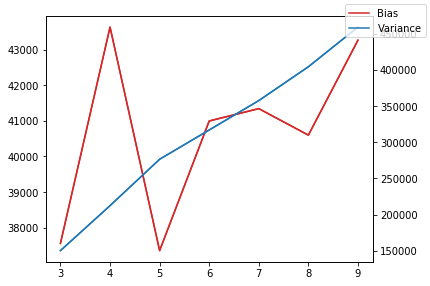

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(list(range(3, MAX_POLY + 1)), degree_vs_bias[2:,0], color=color)
ax1.plot(list(range(3, MAX_POLY + 1)), degree_vs_bias[2:,0], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(3,MAX_POLY + 1)), degree_vs_bias[2:,1], color=color)
ax2.plot(list(range(3,MAX_POLY + 1)), degree_vs_bias[2:,1], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()